In [1]:
from customized.main.DatasetManager import DatasetManager
from customized.main.Evaluator import Evaluator
from customized.main.models.ClusteredItemBasedCF import ClusteredItemBasedCF
from customized.main.models.ClusteredUserBasedCF import ClusteredUserBasedCF
from customized.main.models.ItemBasedCF import ItemBasedCF
from customized.main.models.UserBasedCF import UserBasedCF
from customized.main.utils.plot_generators import gen_grouped_histogram_bars, measure_time

In [2]:
dirname = '/home/damian/Pulpit/Warsztat/CoML/recomm_project/data/'
dm = DatasetManager()

In [3]:
ml100k_filename_ua = dirname + 'ml-100k/ua.base'
ml100k_filename_ua_test = dirname + 'ml-100k/ua.test'

train_ua = dm.load_csv(ml100k_filename_ua, realative=False)
test_ua = dm.load_csv(ml100k_filename_ua_test, realative=False)

user_item_ua = DatasetManager.transform_to_user_item_mat(train_ua, verbose=True)
user_item_ua_test = DatasetManager.transform_to_user_item_mat(test_ua, verbose=True)

User number: 943, item number: 1682
User number: 943, item number: 1664


In [4]:
# load full ml100k
ml100k_filename_full = dirname + 'ml-100k/u.data'

ml100k_data_full = dm.load_csv(ml100k_filename_full, realative=False)
ml100k_train, ml100k_test = DatasetManager.train_test_split(ml100k_data_full, shuffle=False)

ml100k_user_item = DatasetManager.transform_to_user_item_mat(ml100k_train, verbose=True)
ml100k_user_item_test = DatasetManager.transform_to_user_item_mat(ml100k_test, verbose=True)

test size: 9.43 %
User number: 943, item number: 1682
User number: 943, item number: 1664


In [5]:
models = [
    { 'model': UserBasedCF, 'name': 'UserBasedCF'},
    { 'model': ItemBasedCF, 'name': 'ItemBasedCF'},
    { 'model': ClusteredUserBasedCF, 'name': 'ClustUsrBasedCF'},
    { 'model': ClusteredItemBasedCF, 'name': 'ClustItmBasedCF'}
]

plots = [
    {'key': 'fit_time', 'name': 'Fitting time comparison', 'xlabel': 'models', 'ylabel': 't [s]'},
    {'key': 'pred_time', 'name': 'Prediction time comparison', 'xlabel': 'models', 'ylabel': 't [s]'},
    {'key': 'prec', 'name': 'Precision comparison', 'xlabel': 'models', 'ylabel': 'prec'},
    {'key': 'recall', 'name': 'Recall comparison', 'xlabel': 'models', 'ylabel': 'recall'},
    {'key': 'f1', 'name': 'F1 score comparison', 'xlabel': 'models', 'ylabel': 'f1'},
    {'key': 'rmse', 'name': 'RMSE comparison', 'xlabel': 'models', 'ylabel': 'rmse'},
    {'key': 'mae', 'name': 'MAE comparison', 'xlabel': 'models', 'ylabel': 'mae'}
]

repeat = 3

In [6]:
def get_func(user_item, user_item_test):
    
    def func(sink, model_desc, _):
        model_class = model_desc['model']
        model = model_class(verbose=True)
        
        # fit model 
        measure_time(lambda: model.fit(user_item), sink['fit_time'])
        
        # predict
        pred = measure_time(lambda: model.predict_all(), sink['pred_time'])
        
        # recommend
        recomm, _ = model._recommend_all(pred)
        recomm = model._transform_recomm(recomm)
    
        # eval
        eval = Evaluator(user_item_test).eval(recomm, pred)
        
        sink['prec'].append(eval['prec'])
        sink['recall'].append(eval['recall'])
        sink['f1'].append(eval['f1'])
        sink['rmse'].append(eval['rmse'])
        sink['mae'].append(eval['mae'])
    
    return func

======= ml100k ua


(0) started calculation for UserBasedCF case
[UserBasedCF.fit] total 7.39 seconds have spent

[UserBasedCF.predict_all] total 31.56 seconds have spent

[UserBasedCF.fit] total 6.75 seconds have spent

[UserBasedCF.predict_all] total 31.06 seconds have spent

[UserBasedCF.fit] total 6.26 seconds have spent

[UserBasedCF.predict_all] total 31.58 seconds have spent

>>> results for value : 
  >>> fit_time - y: 6.798497676849365
  >>> pred_time - y: 31.399346272150677
  >>> prec - y: 0.22311770943796394
  >>> recall - y: 0.22311770943796394
  >>> f1 - y: 0.22311770943796394
  >>> rmse - y: 2.7590386748049904
  >>> mae - y: 2.473235757817765
(1) started calculation for ItemBasedCF case
[ItemBasedCF.fit] total 28.55 seconds have spent

[ItemBasedCF.predict_all] total 9.33 seconds have spent

[ItemBasedCF.fit] total 31.77 seconds have spent

[ItemBasedCF.predict_all] total 10.20 seconds have spent

[ItemBasedCF.fit] total 28.37 seconds have spent

[ItemBasedCF.predict_all]

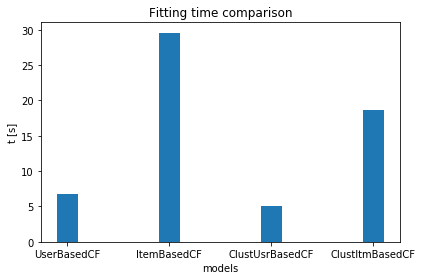

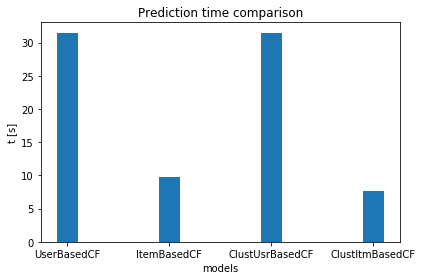

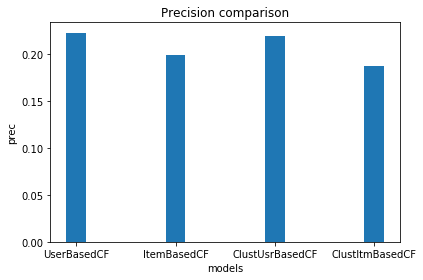

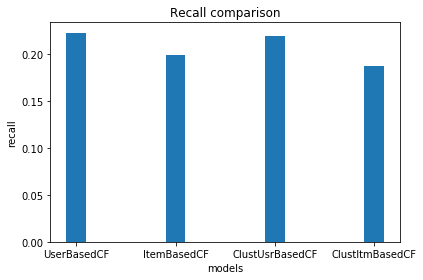

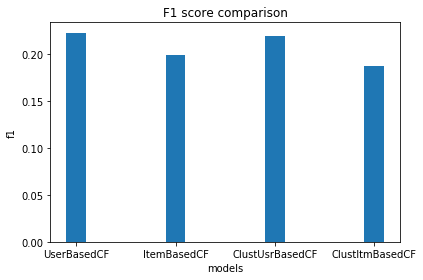

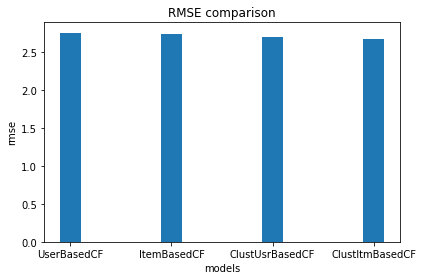

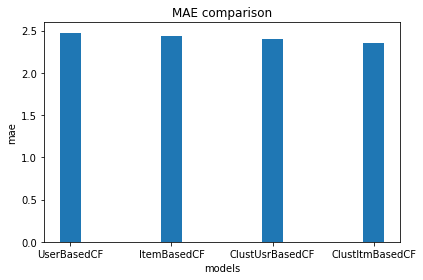

In [7]:
print('======= ml100k ua\n\n')

gen_grouped_histogram_bars(plots, models, [''], get_func(user_item_ua, user_item_ua_test), repeat, 
                           show_bar_values=False, verbose=True, show_legend=False)

======= ml100k


(0) started calculation for UserBasedCF case
[UserBasedCF.fit] total 6.78 seconds have spent

[UserBasedCF.predict_all] total 30.33 seconds have spent

[UserBasedCF.fit] total 6.25 seconds have spent

[UserBasedCF.predict_all] total 30.85 seconds have spent

[UserBasedCF.fit] total 6.42 seconds have spent

[UserBasedCF.predict_all] total 31.77 seconds have spent

>>> results for value : 
  >>> fit_time - y: 6.484285672505696
  >>> pred_time - y: 30.98333191871643
  >>> prec - y: 0.22311770943796394
  >>> recall - y: 0.22311770943796394
  >>> f1 - y: 0.22311770943796394
  >>> rmse - y: 2.7590386748049904
  >>> mae - y: 2.473235757817765
(1) started calculation for ItemBasedCF case
[ItemBasedCF.fit] total 27.37 seconds have spent

[ItemBasedCF.predict_all] total 8.32 seconds have spent

[ItemBasedCF.fit] total 29.19 seconds have spent

[ItemBasedCF.predict_all] total 9.77 seconds have spent

[ItemBasedCF.fit] total 31.07 seconds have spent

[ItemBasedCF.predict_all] tota

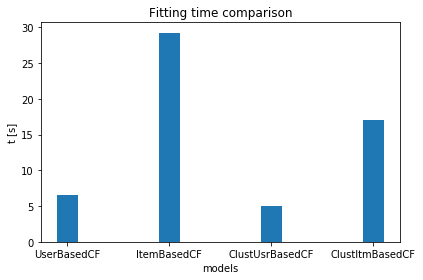

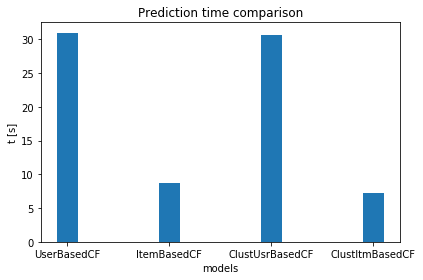

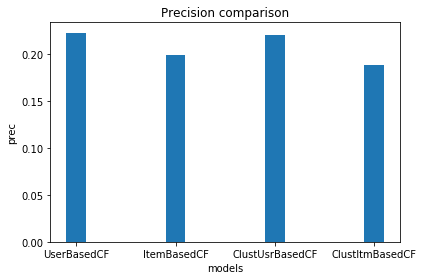

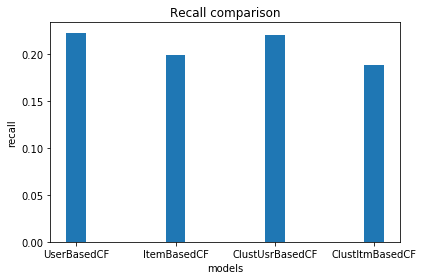

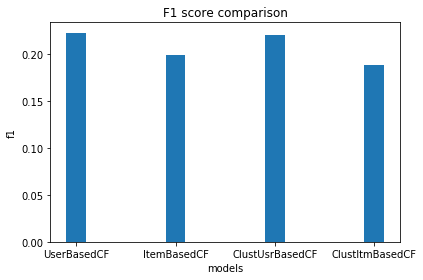

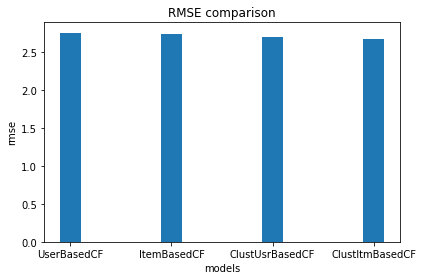

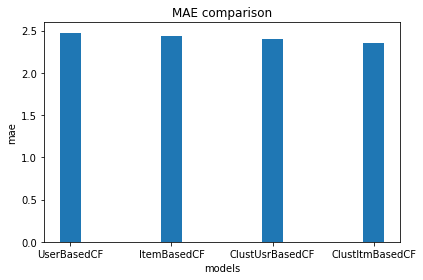

In [8]:
print('======= ml100k\n\n')

gen_grouped_histogram_bars(plots, models, [''], get_func(ml100k_user_item, ml100k_user_item_test), repeat, 
                           show_bar_values=False, verbose=True, show_legend=False)
